In [3]:
import pandas as pd

df = pd.read_csv('/home/rnm/Dev/algotrading/algotrading_1/WIN@N_M5_202205300905_202601061830.csv', sep='\t')


In [4]:
# 1. Combine <DATE> and <TIME> into a single string column
df['Timestamp'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'])

# 2. Set the new column as the DatetimeIndex
df.set_index('Timestamp', inplace=True)
df['Timestamp'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'])

# 3. Rename columns to remove brackets (required by mplfinance)
df = df.rename(columns={
    '<OPEN>': 'Open',
    '<HIGH>': 'High',
    '<LOW>': 'Low',
    '<CLOSE>': 'Close',
    '<TICKVOL>': 'Volume'
})

print(df["Close"].iloc[0:50])

Timestamp
2022-05-30 09:05:00    113440
2022-05-30 09:10:00    113570
2022-05-30 09:15:00    113495
2022-05-30 09:20:00    113645
2022-05-30 09:25:00    113515
2022-05-30 09:30:00    113425
2022-05-30 09:35:00    113430
2022-05-30 09:40:00    113395
2022-05-30 09:45:00    113315
2022-05-30 09:50:00    113305
2022-05-30 09:55:00    113225
2022-05-30 10:00:00    113230
2022-05-30 10:05:00    113220
2022-05-30 10:10:00    113175
2022-05-30 10:15:00    113165
2022-05-30 10:20:00    112930
2022-05-30 10:25:00    112790
2022-05-30 10:30:00    112975
2022-05-30 10:35:00    112850
2022-05-30 10:40:00    112805
2022-05-30 10:45:00    112720
2022-05-30 10:50:00    112775
2022-05-30 10:55:00    112715
2022-05-30 11:00:00    112670
2022-05-30 11:05:00    112640
2022-05-30 11:10:00    112540
2022-05-30 11:15:00    112270
2022-05-30 11:20:00    112290
2022-05-30 11:25:00    111975
2022-05-30 11:30:00    111835
2022-05-30 11:35:00    111775
2022-05-30 11:40:00    111785
2022-05-30 11:45:00    111580


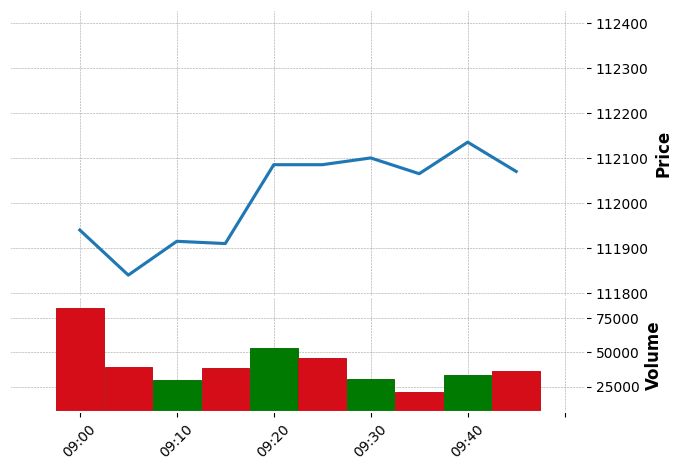

In [6]:
import mplfinance as mpf




filtered_df = df[df.index > '2022-06-01']
ohlc = filtered_df.to_dict(orient='records')

mpf.plot(filtered_df[0:10], type='line', mav=(27), volume=True, style='charles')

In [ ]:
from typing import List, Optional
from pydantic import BaseModel
import copy

class Move(BaseModel):
    move: Optional[str] = None
    pb_type: Optional[str] = None
    bar_1: Optional[dict] = None
    bar_2: Optional[dict] = None




def main_direction(ohlc):
    prev = None
    move = None
    entries = []
    for item in ohlc[:50]:
        if prev is None:
            prev = item
            continue
        if prev.get('Close') < item.get('Close'):
            move= Move(move="up", pb_type=None, bar_1=prev, bar_2=item)
        elif prev.get('Close') > item.get('Close'):
            move= Move(move="down", pb_type=None, bar_1=prev, bar_2=item)
        else:
            move = Move(move="flat", pb_type=None, bar_1=prev, bar_2=item)
        prev = item
        entries.append(move)

    return entries

class Inflection(BaseModel):
    move: Optional[Move] = None
    bar: Optional[dict] = None

def prev_inflection(_move: List[Move], ohlc):
    prev = None
    prev_move_bull = None
    interested_bull = [None, None, None]
    inflections_bull = []
    count = 0
    for move, bar in zip(_move, ohlc):
        if prev is None and move is not None and move.move == 'up':
            prev = move
            prev_move_bull = move
            continue
        if prev is not None and move is not None:
            if interested_bull[0] is None and move.move == 'up':
                interested_bull[0] = move
                interested_bull[1] = move
                interested_bull[2] = move
                prev_move_bull = move
            elif prev.move == 'down' and move.move == 'up':
                count += 1
                interested_bull[0] = interested_bull[1]
                interested_bull[1] = prev_move_bull.model_copy()
                interested_bull[2] = move.model_copy()

        prev = move
        inflections_bull.append(interested_bull)
        print(interested_bull[0].move if interested_bull[0] else None, interested_bull[0].bar_1.get('Timestamp') if interested_bull[0] else None, bar.get("Timestamp"))
    return inflections_bull

direction = main_direction(ohlc)
bull_infletions = prev_inflection(direction, ohlc)
# print([print(infletion.move.move, infletion.bar.get('Timestamp'), bar.get("Timestamp")) for infletion, bar in zip(infletions, ohlc)])


None None 2022-06-01 09:00:00
up 2022-06-01 09:05:00 2022-06-01 09:05:00
up 2022-06-01 09:05:00 2022-06-01 09:10:00
up 2022-06-01 09:05:00 2022-06-01 09:15:00
up 2022-06-01 09:05:00 2022-06-01 09:20:00
up 2022-06-01 09:05:00 2022-06-01 09:25:00
up 2022-06-01 09:05:00 2022-06-01 09:30:00
up 2022-06-01 09:05:00 2022-06-01 09:35:00
up 2022-06-01 09:05:00 2022-06-01 09:40:00
up 2022-06-01 09:15:00 2022-06-01 09:45:00
up 2022-06-01 09:15:00 2022-06-01 09:50:00
up 2022-06-01 09:15:00 2022-06-01 09:55:00
up 2022-06-01 09:35:00 2022-06-01 10:00:00
up 2022-06-01 09:35:00 2022-06-01 10:05:00
up 2022-06-01 09:45:00 2022-06-01 10:10:00
up 2022-06-01 09:45:00 2022-06-01 10:15:00
up 2022-06-01 10:00:00 2022-06-01 10:20:00
up 2022-06-01 10:00:00 2022-06-01 10:25:00
up 2022-06-01 10:10:00 2022-06-01 10:30:00
up 2022-06-01 10:10:00 2022-06-01 10:35:00
up 2022-06-01 10:10:00 2022-06-01 10:40:00
up 2022-06-01 10:10:00 2022-06-01 10:45:00
up 2022-06-01 10:10:00 2022-06-01 10:50:00
up 2022-06-01 10:10:00 2

In [ ]:
def bull_bar_count(_move: List[Move], ohlc):
    highs = [None, None]
    for move, bar in zip(_move[:6], ohlc):
        if highs[0] is None and move is not None:
            highs[0] = move.bar_2 if move.move == 'up' else None
            highs[1] = move.bar_2 if move.move == 'up' else None
            continue
        elif prev_high.get('Close') < bar.get('Close'):
            prev_high = high
            high = bar
    
    print(highs[1].get('Timestamp'))

    
bull_bar_count = bull_bar_count(direction, ohlc)

2022-06-01 09:10:00
